
[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ezeparziale/analisis-uso-bicicletas-caba/blob/main/Analisis%20datos%20bicicletas%20CABA.ipynb)

>[Problema](#scrollTo=aFDXKSJG6-ML)

>>[Herramientas utilizadas](#scrollTo=X2C709eFqRDd)

>>[Carga de datos](#scrollTo=RzO8w1ysoR5P)

>>>[Variables](#scrollTo=1-cYbMP6z_eW)

>>>[Lectura de set de datos](#scrollTo=GAqxZV3kovdT)

>>[Limpieza de datos](#scrollTo=KAjjl-EDoYZ_)

>>>[Recorridos 2019](#scrollTo=sVOIxPpL0qo0)

>>>>[Casuisticas de limpieza de recorridos 2019](#scrollTo=rcRGpSgs6mBU)

>>>>>[Casuistica 1](#scrollTo=THezWfPT8_EI)

>>>>>[Casuistica 2](#scrollTo=sBuZH_XZ9DQr)

>>>>>[Casuistica 3](#scrollTo=aB-RBQqv9JtD)

>>>>>[Casuistica 4](#scrollTo=xfXhpPc69QdU)

>>>>[Limpieza casuisticas](#scrollTo=WzllNbzb_mSg)

>>>>[Data frame limpio de recorridos 2019](#scrollTo=f4IY8t1jMwLn)

>>>[Recorridos 2020](#scrollTo=sH4uOOe8tTbQ)

>>>>[Data frame limpio de recorridos 2020](#scrollTo=TpTpr9EDM4hS)

>>>[Recorridos 2021](#scrollTo=gl5MyHC5u-On)

>>>>[Campos faltantes](#scrollTo=hxckT-NyIxUa)

>>>>[Data frame limpio de recorridos 2021](#scrollTo=YVkLDIWgNCrd)

>>[Recorridos final](#scrollTo=7i8J4twhNXBf)

>>>[Datos iniciales](#scrollTo=eQKa02QyyA9D)

>>>[Formato de campos](#scrollTo=MEXp66x_vqcB)

>>>[Comunas](#scrollTo=tpMQJOaoxzUP)

>>>[Clima](#scrollTo=30r6pMqhJPBJ)

>>>[Limpieza de recorrido irregulares](#scrollTo=ksatFanNatdA)

>>>[Dataframe final de recorridos](#scrollTo=mjljiuaQzZa0)

>>[Transformación de datos](#scrollTo=1Ht6Zro3oje8)

>>[Análisis y Visualizaciones](#scrollTo=-oZALeyloq56)

>>[Conclusión](#scrollTo=q7ppUWSYpA7A)

>>[Almacenamiento de resultados](#scrollTo=4nsbdrUgpL4k)

>>[Bibliografía](#scrollTo=6A45zjxzWRgo)



## Problema

> Buscamos ver el impacto de la pandemia en el uso de bicicletas publicas.  


El servicio de Ecobici cuenta con más de 2.000 bicicletas y 230 estaciones repartidas por toda la Ciudad de Buenos Aires.

El uso de las bicis es muy simple: 

*  Hay que registrarse a través de la app BA Ecobici. 

*  Elegir el pase que se quiera utilizar. 
El servicio consta de 4 categorías: 
  * GRATIS: para pedalear durante 30 minutos de lunes a viernes.
  * INTENSIVO: con viajes de 60 minutos todos los días con un costo de 700 pesos mensuales.
  * RECREATIVO: para pasear y disfrutar los fines de semana y feriados, desde  70 pesos por viaje.
  * TURÍSTICO: para los turistas extranjeros que quieran recorrer la Ciudad en bici, desde 900 pesos por día. 

*  Hay que generar un código a través de la app, ingresarlo en la estación y desbloquear la bici para empezar a pedalear. 

*  Una vez finalizado el viaje, se debe buscar un lugar disponible en cualquier estación cercana, anclar la bici, esperar la señal sonora y la luz verde para comprobar que se devolvió correctamente.

<img src="https://raw.githubusercontent.com/ezeparziale/analisis-uso-bicicletas-caba/main/img/ecobici1.jpg"/>


## Herramientas utilizadas

A continuación detallen las herramientas utilizadas para el desarrollo del examen.

* Pandas para la lectura de los datos
* Matplotlib, seaborn y plotly para los graficos
* Json para lectura de archivo json
* Shapely para ver si un punto waypoint esta dentro de un poligono
* Wordcloud para nube de palabras



In [1]:
!pip install geopandas 
!pip install --upgrade tables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns
import json

from shapely.wkt import loads
from shapely.geometry import Point
from PIL import Image
from wordcloud import WordCloud

from urllib.request import urlopen

import gc

     |████████████████████████████████| 1.0MB 4.9MB/s 
     |████████████████████████████████| 15.4MB 191kB/s 
     |████████████████████████████████| 6.6MB 28.7MB/s 
     |████████████████████████████████| 4.3MB 6.0MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga de datos

Se cargaron los siguientes archivos:

*   Recorridos de bicicletas
*   Estaciones de bicicleta
*   Comunas
*   Mapa de comuna y estaciones
*   Datos de clima

### Variables

In [3]:
# Path de los archivos a utilizar
path = 'https://github.com/ezeparziale/analisis-uso-bicicletas-caba/tree/main/'  # Path default del repositorio

path_recorridos_2019_csv = path + 'data/recorridos_realizados/csv/recorridos-realizados-2019.csv'
path_recorridos_2020_csv = path + 'data/recorridos_realizados/csv/recorridos-realizados-2020.csv'
path_recorridos_2021_csv = path + 'data/recorridos_realizados/csv/recorridos-realizados-2021.csv'

path_recorridos_2019_hdf = path + 'data/recorridos_realizados/hdf/recorridos_2019.h5'
path_recorridos_2020_hdf = path + 'data/recorridos_realizados/hdf/recorridos_2020.h5'
path_recorridos_2021_hdf = path + 'data/recorridos_realizados/hdf/recorridos_2021.h5'

path_estaciones = path + 'data/extras/nuevas-estaciones-bicicletas-publicas.csv'

path_comunas = path + 'data/extras/comunas.csv'

path_clima = path + 'data/extras/fechas_con_lluvia.csv'

path_bici_map = path + 'data/extras/df_bici_map.csv'

path_comunas_gson = path + 'data/mapa/CABA_comunas.geojson'

path_estacion_gson = path + 'data/mapa/nuevas-estaciones-bicicletas-publicas.geojson'

### Lectura de set de datos

In [4]:
'''
Los archivos CSV de recorridos pesan varios megas y pierden performace de lectura frente a los archivos hdf
Decidimos cargar nuestros archivos CSV y convertirlos a formato HDF para posteriores cargas.
Con esto logramos reducir los tiempos de carga pasando de 70 a 24 segundos la carga de los archivos.
'''
# Datos de recorridos de bicicletas csv
# df_raw_recorridos_2019 = pd.read_csv(path_recorridos_2019_csv, sep=',')
# df_raw_recorridos_2020 = pd.read_csv(path_recorridos_2020_csv, sep=',')
# df_raw_recorridos_2021 = pd.read_csv(path_recorridos_2021_csv, sep=',')
# Entre 66-70 segundos leyendo desde CSV

# df_raw_recorridos_2019.to_hdf(path_recorridos_2019_hdf, key='df', mode='w')
# df_raw_recorridos_2020.to_hdf(path_recorridos_2020_hdf, key='df', mode='w')
# df_raw_recorridos_2021.to_hdf(path_recorridos_2021_hdf, key='df', mode='w')

# Datos de recorridos de bicicletas hdf
df_raw_recorridos_2019 = pd.read_hdf(path_recorridos_2019_hdf, 'df')
df_raw_recorridos_2020 = pd.read_hdf(path_recorridos_2020_hdf, 'df')
df_raw_recorridos_2021 = pd.read_hdf(path_recorridos_2021_hdf, 'df')
# Entre 20-24 segundos leyendo desde HDF

# Datos de estaciones de bicicleta
df_raw_estaciones = pd.read_csv(path_estaciones, sep=',')

# Datos de comunas
df_comunas = pd.read_csv(path_comunas)

# Datos de clima para fechas desde el 2019 a Junio-2021
df_clima = pd.read_csv(path_clima)

# Carga de los datos de comunas para el mapa
comunas_poligono = json.load(open(path_comunas_gson)) # Lectura del archivo de poligonos de comunas

# Carga de los datos de estacion para el mapa
waypoint_estaciones = json.load(open(path_estacion_gson)) # Lectura del archivo de waypoint de estaciones de bici

## Limpieza de datos

### Recorridos 2019

Datos de recorridos de bicicleta del 2019.  
Tiene los datos con la utilización del sistema viejo.  
***BICIS AMARILLAS***

In [5]:
# Estructura del archivo de recorridos de 2019
df_raw_recorridos_2019.info()
df_raw_recorridos_2019.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6367314 entries, 0 to 6367313
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   periodo                     int64  
 1   id_usuario                  int64  
 2   genero_usuario              object 
 3   fecha_origen_recorrido      object 
 4   id_estacion_origen          object 
 5   nombre_estacion_origen      object 
 6   long_estacion_origen        float64
 7   lat_estacion_origen         float64
 8   domicilio_estacion_origen   object 
 9   duracion_recorrido          object 
 10  fecha_destino_recorrido     object 
 11  id_estacion_destino         float64
 12  nombre_estacion_destino     object 
 13  long_estacion_destino       float64
 14  lat_estacion_destino        float64
 15  domicilio_estacion_destino  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 825.8+ MB


(6367314, 16)

In [6]:
# Previw de datos de recorridos del 2019
df_raw_recorridos_2019.head(3)

periodo  ...            domicilio_estacion_destino
0     2019  ...                   9 de Julio y Moreno
1     2019  ...  Bolivar entre Adolfo Alsina y Moreno
2     2019  ...                                   NaN

[3 rows x 16 columns]

Verificamos los nulos de los recorridos del 2019.  
El sistema viejo genera muchas inconsistencia en los datos y no completa varios campos que deberian venir completos.

In [7]:
# Verificamos si hay nulos en los campos
print('='*40)
print('Nulos en df_raw_recorridos_2019')
print('='*40)
print(df_raw_recorridos_2019.isnull().sum()) # Cantidad de nulos por campos datos recorridos bici 2019

Nulos en df_raw_recorridos_2019
periodo                             0
id_usuario                          0
genero_usuario                6163203
fecha_origen_recorrido         869354
id_estacion_origen              14697
nombre_estacion_origen              4
long_estacion_origen            16840
lat_estacion_origen             16840
domicilio_estacion_origen      129481
duracion_recorrido                149
fecha_destino_recorrido        867538
id_estacion_destino             14938
nombre_estacion_destino             4
long_estacion_destino           17105
lat_estacion_destino            17105
domicilio_estacion_destino     129917
dtype: int64


En función de las columnas que tiene el archivo de recorridos empezamos a definir que campos nos servirian para nuestro análisis.
Excluimos los campos de domicilio de las estaciones.

In [8]:
# Columnas que vamos a utilizar
columnas = ['id_usuario',
            'fecha_origen_recorrido',
            'id_estacion_origen',
            'nombre_estacion_origen',
            'long_estacion_origen',
            'lat_estacion_origen',
            'duracion_recorrido',
            'fecha_destino_recorrido',
            'id_estacion_destino',
            'nombre_estacion_destino',
            'long_estacion_destino',
            'lat_estacion_destino'
            ]

#### Casuisticas de limpieza de recorridos 2019

El archivo de recorridos de 2019 tiene varios datos nulos los cuales pueden ser completados por medio de otros campos.  
Para esto definimos una serie de casuisticas para poder limpiar este set de datos.
El origen de estos recorridos viene del sistema viejo el cual tenia muchos errores.

1. Fecha origen NULA y Fecha destino completa con duracion completa >>> restamos fecha destino - duracion = fecha origen

2. Fecha origen completa y Fecha destino NULA con duracion completa >>> sumamos fecha origen + duracion = fecha destino

3. Fecha origen completa y Fecha destino NULA con duracion NULA >>> sumamos fecha origen + 1 hora (por limite de duracion de uso de bici) = fecha destino

4. Fecha origen NULA, Fecha destino NULA >>> SE ELIMINA

##### Casuistica 1

Fecha origen NULA y Fecha destino completa con duracion completa.

La ***fecha_origen_recorrido*** la completamos con la resta de ***fecha_destino_recorrido*** y ***duracion_recorrido***

In [9]:
# Casuistica 1:
# fecha_origen_recorrido  = NULA
# fecha_destino_recorrido = COMPLETA
# duracion_recorrido      = COMPLETA
c1_2019 = df_raw_recorridos_2019[(df_raw_recorridos_2019['fecha_origen_recorrido'].isnull()) &      # fecha de origen del recorrido NULA
                                 (df_raw_recorridos_2019['fecha_destino_recorrido'].notnull()) &    # fecha de destino del recorrido COMPLETA
                                 (df_raw_recorridos_2019['duracion_recorrido'].notnull())           # duración del recorrido COMPLETA
                                ].copy() # Casuistica 1
# c1_2019
# Convertimos los campos de fecha a su formato indicado
c1_2019['fecha_origen_recorrido'] = pd.to_datetime(c1_2019['fecha_origen_recorrido'])   # Conversión a tipo de datetime
c1_2019['fecha_destino_recorrido'] = pd.to_datetime(c1_2019['fecha_destino_recorrido']) # Conversión a tipo de datetime
c1_2019['duracion_recorrido'] = pd.to_timedelta(c1_2019['duracion_recorrido'])          # Conversión a tipo de timedelta

#c1_2019.info()
c1_2019['fecha_origen_recorrido'] = c1_2019['fecha_destino_recorrido'] - c1_2019['duracion_recorrido'] # Completamos el campo fecha_origen_recorrido
c1_2019.head(3)

periodo  id_usuario  ... lat_estacion_destino domicilio_estacion_destino
2860259     2019       52803  ...           -34.651955                Traful 3800
2860280     2019        9955  ...           -34.651955                Traful 3800
2860370     2019      564465  ...           -34.651955                Traful 3800

[3 rows x 16 columns]

##### Casuistica 2

Fecha origen completa y Fecha destino NULA con duracion completa 

La ***fecha_destino_recorrido*** la completamos con la suma de ***fecha_origen_recorrido*** y **duracion_recorrido**

In [10]:
# Casuistica 2:
# fecha_origen_recorrido  = COMPLETA
# fecha_destino_recorrido = NULA
# duracion_recorrido      = COMPLETA
c2_2019 = df_raw_recorridos_2019[(df_raw_recorridos_2019['fecha_origen_recorrido'].notnull()) &   # fecha de origen del recorrido COMPLETA
                                 (df_raw_recorridos_2019['fecha_destino_recorrido'].isnull()) &   # fecha de destino del recorrido NULA
                                 (df_raw_recorridos_2019['duracion_recorrido'].notnull())         # duración del recorrido COMPLETA
                                ].copy() # Casuistica 2
# c2_2019
# Convertimos los campos de fecha a su formato indicado
c2_2019['fecha_origen_recorrido']= pd.to_datetime(c2_2019['fecha_origen_recorrido'])    # Conversión a tipo de datetime
c2_2019['fecha_destino_recorrido']= pd.to_datetime(c2_2019['fecha_destino_recorrido'])  # Conversión a tipo de datetime
c2_2019['duracion_recorrido']= pd.to_timedelta(c2_2019['duracion_recorrido'])           # Conversión a tipo de timedelta

#c2_2019.info()
c2_2019['fecha_destino_recorrido'] = c2_2019['fecha_origen_recorrido'] + c2_2019['duracion_recorrido'] # Completamos el campo fecha_destino_recorrido
c2_2019.head(3)

periodo  id_usuario  ... lat_estacion_destino domicilio_estacion_destino
2860306     2019      394209  ...           -34.651955                Traful 3800
2860605     2019      417283  ...           -34.651955                Traful 3800
2860719     2019      398837  ...           -34.651955                Traful 3800

[3 rows x 16 columns]

##### Casuistica 3

Fecha origen completa y Fecha destino NULA con duracion NULA 

El limite de duracion de uso de bici es de 1 hora.

El ***duracion_recorrido*** lo seteamos con el maximo permitido de 1 hora.
Luego la ***fecha_destino_recorrido*** la completamos con la suma de **fecha_origen_recorrido** y **duracion_recorrido**



In [11]:
# Casuistica 3:
# fecha_origen_recorrido  = COMPLETA
# fecha_destino_recorrido = NULA
# duracion_recorrido      = NULA
c3_2019 = df_raw_recorridos_2019[(df_raw_recorridos_2019['fecha_origen_recorrido'].notnull()) &   # fecha de origen del recorrido COMPLETA
                                 (df_raw_recorridos_2019['fecha_destino_recorrido'].isnull()) &   # fecha de destino del recorrido NULA
                                 (df_raw_recorridos_2019['duracion_recorrido'].isnull())          # duración del recorrido NULA
                                ].copy() # Casuistica 3
# c3_2019
# Convertimos los campos de fecha a su formato indicado
c3_2019['fecha_origen_recorrido']= pd.to_datetime(c3_2019['fecha_origen_recorrido'])    # Conversión a tipo de datetime
c3_2019['fecha_destino_recorrido']= pd.to_datetime(c3_2019['fecha_destino_recorrido'])  # Conversión a tipo de datetime
c3_2019['duracion_recorrido']= pd.to_timedelta(c3_2019['duracion_recorrido'])           # Conversión a tipo de timedelta

#c3_2019.info()
c3_2019['duracion_recorrido'] = pd.Timedelta(pd.offsets.Second(3600)) # Generamos el campo de duracion_recorrido con 1 hora
c3_2019['fecha_destino_recorrido'] = c3_2019['fecha_origen_recorrido'] + c3_2019['duracion_recorrido'] # Completamos el campo fecha_destino_recorrido
c3_2019.head(3)

periodo  id_usuario  ... lat_estacion_destino domicilio_estacion_destino
408      2019      307992  ...                  NaN                        NaN
2200     2019      558887  ...                  NaN                        NaN
3139     2019      538510  ...                  NaN                        NaN

[3 rows x 16 columns]

##### Casuistica 4

Fecha origen NULA, Fecha destino NULA

En estos casos estos registros presentan inconsistencias con la fecha de incio y fin por lo cual no sabriamos cuando se realizo el viaje.

Hay casos tambien que no solo tienen problema en las fechas sino en las estacion de origen y destino.

In [12]:
# Casuistica 4:
# fecha_origen_recorrido  = NULA
# fecha_destino_recorrido = NULA
# duracion_recorrido      = NULA
c4_2019 = df_raw_recorridos_2019[(df_raw_recorridos_2019['fecha_origen_recorrido'].isnull()) &    # fecha de origen del recorrido NULA
                                 (df_raw_recorridos_2019['fecha_destino_recorrido'].isnull())     # fecha de destino del recorrido NULA
                                ] # Casuistica 4
c4_2019.head(3)

periodo  id_usuario  ... lat_estacion_destino domicilio_estacion_destino
2459356     2019      130849  ...                  NaN                        NaN
2461804     2019      130849  ...                  NaN                        NaN
2464252     2019      130849  ...                  NaN                        NaN

[3 rows x 16 columns]

#### Limpieza casuisticas

Eliminamos estas casuisticas de nuestro data set y agregamos las versiones con las correcciones.

In [13]:
df_2019 = df_raw_recorridos_2019.copy() # Creacion de df_2019 limpio
df_2019 = df_2019.drop(c1_2019.index)   # Eliminación de indexes de casuistica 1
df_2019 = df_2019.drop(c2_2019.index)   # Eliminación de indexes de casuistica 2
df_2019 = df_2019.drop(c3_2019.index)   # Eliminación de indexes de casuistica 3
df_2019 = df_2019.drop(c4_2019.index)   # Eliminación de indexes de casuistica 4

df_2019 = df_2019.append([c1_2019, c2_2019, c3_2019]) # Juntamos con los dataframes de las casuisticas donde se limpio la información
# df_2019.info()

Hay dos estaciones que no tienen cargado el id de estación y si la descripción. Para estos casos se lo completamos manualmente.

In [14]:
# Completamos los valores de las estaciones de origen que podemos mapear

# Carga manual para las estacion de origen que no tienen cargado el id_estacion_origen y si nombre_estacion_origen
df_2019.loc[df_2019['nombre_estacion_origen'].isin(['Ministerio De Justicia Y Seguridad']), 'id_estacion_origen'] = 126
df_2019.loc[df_2019['nombre_estacion_origen'].isin(['Ingeniero Butty']), 'id_estacion_origen'] = 35

# Carga manual para las estacion de origen que no tienen cargado el id_estacion_destino y si nombre_estacion_destino
df_2019.loc[df_2019['nombre_estacion_destino'].isin(['Ministerio De Justicia Y Seguridad']), 'id_estacion_destino'] = 126
df_2019.loc[df_2019['nombre_estacion_destino'].isin(['Ingeniero Butty']), 'id_estacion_destino'] = 35

df_2019 = df_2019[(df_2019['id_estacion_origen'].notnull()) & (df_2019['id_estacion_destino'].notnull())]    # Limpiamos los id de estacion origen y destino con errores en los codigos
df_2019 = df_2019[(df_2019['lat_estacion_origen'].notnull()) & (df_2019['lat_estacion_destino'].notnull())]  # Limpiamos las latitudes tanto de origen y destino nulas

Verificamos la cantidad de nulos que obtenemos luego de la limpieza del data set de recorridos 2019

In [15]:
df_2019[columnas].isnull().sum()  # Cantidad de nulos por campos

id_usuario                 0
fecha_origen_recorrido     0
id_estacion_origen         0
nombre_estacion_origen     0
long_estacion_origen       0
lat_estacion_origen        0
duracion_recorrido         0
fecha_destino_recorrido    0
id_estacion_destino        0
nombre_estacion_destino    0
long_estacion_destino      0
lat_estacion_destino       0
dtype: int64

#### Data frame limpio de recorridos 2019

Creamos el data set limpio con las columnas que vamos a utilizar.  
Mostramos datos de la limpieza del dataset.

In [16]:
df_2019 = df_2019[columnas] # DataFrame final para los recorridos de 2019

filas_df_raw_2019 = df_raw_recorridos_2019.shape[0]
filas_df_2019 = df_2019.shape[0]
ratio_limpieza_2019 = filas_df_2019 / filas_df_raw_2019
print(f'Datos raw: {filas_df_raw_2019:,}')
print(f'Datos limpios: {filas_df_2019:,}')
print(f"Nos quedamos con un {ratio_limpieza_2019:.2%} del data set de recorridos del 2019")

Datos raw: 6,367,314
Datos limpios: 5,523,894
Nos quedamos con un 86.75% del data set de recorridos del 2019


### Recorridos 2020

Datos de recorridos de bicicleta del 2020.  
Tiene los datos con la utilización del sistema nuevo.  
***BICIS NARANJAS***

In [17]:
# Estructura del archivo de recorridos de 2020
df_raw_recorridos_2020.info()
df_raw_recorridos_2020.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002945 entries, 0 to 2002944
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   duracion_recorrido          int64  
 1   id_estacion_origen          int64  
 2   fecha_origen_recorrido      object 
 3   nombre_estacion_origen      object 
 4   fecha_destino_recorrido     object 
 5   id_estacion_destino         float64
 6   nombre_estacion_destino     object 
 7   id_usuario                  int64  
 8   direccion_estacion_origen   object 
 9   long_estacion_origen        float64
 10  lat_estacion_origen         float64
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  periodo                     int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 244.5+ MB


(2002945, 15)

In [18]:
# Previw de datos de recorridos del 2020
df_raw_recorridos_2020.head(3)

duracion_recorrido  id_estacion_origen  ... lat_estacion_destino periodo
0                 882                 116  ...           -34.590541    2020
1                 894                 116  ...           -34.590541    2020
2                1361                 116  ...           -34.590541    2020

[3 rows x 15 columns]

Verificamos los nulos de los recorridos del 2020.  
Al utilizar el sistema nuevo no viene información nula en los campos.

In [19]:
# Verificamos si hay nulos en los campos
print('='*40)
print('Nulos en df_raw_recorridos_2020')
print('='*40)
if df_raw_recorridos_2020.isnull().values.any():
  print(df_raw_recorridos_2020.isnull().sum()) # Cantidad de nulos por campos
else:
  print('Sin nulos')

Nulos en df_raw_recorridos_2020
Sin nulos


#### Data frame limpio de recorridos 2020

Creamos el data set limpio con las columnas que vamos a utilizar.  
Mostramos datos de la limpieza del dataset.

In [20]:
df_2020 = df_raw_recorridos_2020[columnas].copy() # DataFrame final para los recorridos de 2020
df_2020['duracion_recorrido']= pd.to_timedelta(df_2020['duracion_recorrido'], unit='s')    # Conversión a tipo de timedelta

filas_df_raw_2020 = df_raw_recorridos_2020.shape[0]
filas_df_2020 = df_2020.shape[0]
ratio_limpieza_2020 = filas_df_2020 / filas_df_raw_2020
print(f'Datos raw: {filas_df_raw_2020:,}')
print(f'Datos limpios: {filas_df_2020:,}')
print(f"Nos quedamos con un {ratio_limpieza_2020:.2%} del data set de recorridos del 2020")

Datos raw: 2,002,945
Datos limpios: 2,002,945
Nos quedamos con un 100.00% del data set de recorridos del 2020


### Recorridos 2021

Datos de recorridos de bicicleta del 2021.  
Tiene los datos con la utilización del sistema nuevo.  
Se cambio el modelo de datos versus el modelo utilizado en 2020.  
Se cambiaron los nombres de los campos y desaparecieron algunos.  
***BICIS NARANJAS***

In [21]:
# Estructura del archivo de recorridos de 2021
df_raw_recorridos_2021.info()
df_raw_recorridos_2021.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328726 entries, 0 to 1328725
Data columns (total 13 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   ID                                  1328726 non-null  int64  
 1   Estado cerrado                      1328726 non-null  object 
 2   Duración                            1328726 non-null  int64  
 3   Id de estación de inicio            1328726 non-null  int64  
 4   Fecha de inicio                     1328726 non-null  object 
 5   Nombre de estación de inicio        1328726 non-null  object 
 6   Fecha de fin                        1328726 non-null  object 
 7   Id de estación de fin de viaje      1328723 non-null  float64
 8   Nombre de estación de fin de viaje  1328723 non-null  object 
 9   ID de ciclista                      1328726 non-null  int64  
 10  Tipo de ciclista                    1328726 non-null  object 
 11  Modelo de b

(1328726, 13)

In [22]:
# Previw de datos de recorridos del 2021
df_raw_recorridos_2021.head(3)

ID Estado cerrado  ...  Modelo de bicicleta  Origen de viaje
0  11204995         NORMAL  ...               ICONIC             CODE
1  11204938         NORMAL  ...               ICONIC             CODE
2  11204928         NORMAL  ...               ICONIC             CODE

[3 rows x 13 columns]

Verificamos los nulos de los recorridos del 2021.   
En este año el sistema nuevo genero unos nulos lo cual entedemos que fueron por algun error del modelo de datos nuevo. 

In [23]:
# Verificamos si hay nulos en los campos
print('='*40)
print('Nulos en df_raw_recorridos_2021')
print('='*40)
print(df_raw_recorridos_2021.isnull().sum()) # Cantidad de nulos por campos

Nulos en df_raw_recorridos_2021
ID                                    0
Estado cerrado                        0
Duración                              0
Id de estación de inicio              0
Fecha de inicio                       0
Nombre de estación de inicio          0
Fecha de fin                          0
Id de estación de fin de viaje        3
Nombre de estación de fin de viaje    3
ID de ciclista                        0
Tipo de ciclista                      0
Modelo de bicicleta                   0
Origen de viaje                       0
dtype: int64


A partir del 2021 el set de datos de recorridos utiliza otra nomenclatura en los campos.  
Decidimos normalizar los campos.


In [24]:
df_2021 = df_raw_recorridos_2021.copy()
df_2021.columns = ['ID',
                  'Estado cerrado', 
                  'duracion_recorrido',  
                  'id_estacion_origen', 
                  'fecha_origen_recorrido', 
                  'nombre_estacion_origen', 
                  'fecha_destino_recorrido', 
                  'id_estacion_destino', 
                  'nombre_estacion_destino', 
                  'id_usuario',  
                  'Tipo de ciclista',  
                  'Modelo de bicicleta',
                  'Origen de viaje' 
                  ]
#df_2021.head()

#### Campos faltantes

El archivo de recorridos de bici 2021 no tiene los campos de latitud y longuitud de origen y destino.

Lo vamos a completar utilizando el maestro de estaciones de bici que tiene estos campos faltantes.

La latitud y longuitud se encuentra en el campo ***WKT*** el cual vamos a extraer la info de este campo.

In [25]:
# Formateo de latitud y longuitud para agregar al set de recorridos 2021
df_estaciones = df_raw_estaciones.copy()
df_estaciones['coordenadas'] = df_estaciones.WKT.str.replace('(','')
df_estaciones['coordenadas'] = df_estaciones.coordenadas.str.replace(')','')
df_estaciones['coordenadas'] = df_estaciones.coordenadas.str.replace('POINT','')
coordenadas = df_estaciones.coordenadas.str.split(expand=True)

df_estaciones = pd.concat([df_estaciones, coordenadas], axis=1)
df_estaciones.drop(['coordenadas'], axis=1, inplace=True)
df_estaciones.rename(columns={0:'long_estacion', 1:'lat_estacion'}, inplace=True)
df_estaciones.head(3)

WKT  ...       lat_estacion
0  POINT (-58.3747109506359 -34.5924239181221)  ...  -34.5924239181221
1    POINT (-58.368256111128 -34.611033074021)  ...   -34.611033074021
2  POINT (-58.3687766674259 -34.6018228613782)  ...  -34.6018228613782

[3 rows x 10 columns]

Completamos con latitud y longuitud para origen y destino.  



> Existe un set de recorridos los cuales no tenemos la latitud y longuitud de estas estaciones.  
Estas estaciones tampoco existen en el maestro de estaciones.  
Decidimos dejarlas para el analisis ya que solo nos afectaria al analisis de geolocalización.

> Volumen de registro sin datos geo 10557 para ORIGEN  y 10935 para DESTINO.  

In [26]:
# Completamos con los campos de latitud y longuitud para estaciones ORIGEN
df_2021 = df_2021.merge(df_estaciones, how='left', left_on='nombre_estacion_origen', right_on='nombre')             # Agrgamos latitud y longuitud de estacion de origen
df_2021 = df_2021.rename(columns={'long_estacion':'long_estacion_origen', 'lat_estacion':'lat_estacion_origen'})    # Renombre de los campos

# Completamos con los campos de latitud y longuitud para estaciones DESTINO
df_2021 = df_2021.merge(df_estaciones, how='left', left_on='nombre_estacion_destino', right_on='nombre')            # Agrgamos latitud y longuitud de estacion de destino
df_2021 = df_2021.rename(columns={'long_estacion':'long_estacion_destino', 'lat_estacion':'lat_estacion_destino'})  # Renombre de los campos

# df_2021[df_2021['lat_estacion_origen'].isnull()]  # 10557 sin latitud origen
# df_2021[df_2021['lat_estacion_destino'].isnull()] # 10935 sin latitud origen 

Conversión de tipo de fechas.

> Se detecto que el campo ***duracion_recorrido*** no tiene bien el calculo del tiempo entre la salida y llega. Por este motivo lo recalculamos ya que tenemos los horarios en los campos fecha.

In [27]:
df_2021['fecha_origen_recorrido']= pd.to_datetime(df_2021['fecha_origen_recorrido'])    # Conversión a tipo de datetime
df_2021['fecha_destino_recorrido']= pd.to_datetime(df_2021['fecha_destino_recorrido'])  # Conversión a tipo de datetime
df_2021['duracion_recorrido'] = df_2021['fecha_destino_recorrido'] - df_2021['fecha_origen_recorrido']  # Corregimos la duracion del recorrido en funcion de la fecha inicio y fin

Verificamos los nulos de los recorridos del 2021.  

> Lo unicos nulos son los de geolocalización para unos recorridos.

In [28]:
# Nulos del set de recorridos 2021 limpio
df_2021[columnas].isnull().sum()

id_usuario                     0
fecha_origen_recorrido         0
id_estacion_origen             0
nombre_estacion_origen         0
long_estacion_origen       10557
lat_estacion_origen        10557
duracion_recorrido             0
fecha_destino_recorrido        0
id_estacion_destino            3
nombre_estacion_destino        3
long_estacion_destino      10935
lat_estacion_destino       10935
dtype: int64

#### Data frame limpio de recorridos 2021

Creamos el data set limpio con las columnas que vamos a utilizar.  
Mostramos datos de la limpieza del dataset.

In [29]:
df_2021 = df_2021[columnas] # DataFrame final para los recorridos de 2021

filas_df_raw_2021 = df_raw_recorridos_2021.shape[0]
filas_df_2021 = df_2021.shape[0]
ratio_limpieza_2021 = filas_df_2021 / filas_df_raw_2021
print(f'Datos raw: {filas_df_raw_2021:,}')
print(f'Datos limpios: {filas_df_2021:,}')
print(f"Nos quedamos con un {ratio_limpieza_2021:.2%} del data set de recorridos del 2021")

Datos raw: 1,328,726
Datos limpios: 1,328,726
Nos quedamos con un 100.00% del data set de recorridos del 2021


## Recorridos final

Armamos el set final de los recorridos que incluye los viajes de 2019, 2020 y 2021 (Hasta Junio)

### Datos iniciales

Contamos con los siguientes datos de recorridos

In [30]:
pd.DataFrame([{'Recorridos': 2019,'Raw': "{0:,}".format(filas_df_raw_2019),'Limpieza': "{0:,}".format(filas_df_2019),'Ratio': "{0:.2f}%".format(ratio_limpieza_2019 * 100)},
        {'Recorridos': 2020,'Raw': "{0:,}".format(filas_df_raw_2020),'Limpieza': "{0:,}".format(filas_df_2020),'Ratio': "{0:.2f}%".format(ratio_limpieza_2020 * 100)},
        {'Recorridos': 2021,'Raw': "{0:,}".format(filas_df_raw_2021),'Limpieza': "{0:,}".format(filas_df_2021),'Ratio': "{0:.2f}%".format(ratio_limpieza_2021 * 100)}])

Recorridos        Raw   Limpieza    Ratio
0        2019  6,367,314  5,523,894   86.75%
1        2020  2,002,945  2,002,945  100.00%
2        2021  1,328,726  1,328,726  100.00%

Creacion del dataframe ***df_recorridos_bici*** final el cual se utilizará en la sección de transformaciones

In [31]:
df_recorridos_bici = pd.DataFrame(columns=columnas)                          # Creamos el dataframe vacio
df_recorridos_bici = df_recorridos_bici.append([df_2019, df_2020, df_2021])  # Jutanmos los dataframe de recorridos de 2019, 2020, 2021
print('='*40)
print(f"Total de recorridos: {df_recorridos_bici.shape[0]:,}")
print('='*40)

Total de recorridos: 8,855,565


Para liberar un poco la memoria borramos los dataframe que no vamos a volver a utlizar. 
> Solo lo usamos porque collab free nos limita a 12gb. Con más recursos no hace falta esta sección.

In [32]:
del [[df_raw_recorridos_2021, df_raw_recorridos_2020, df_raw_recorridos_2019, c1_2019, c2_2019, c3_2019]] # Borrado de los data frame no utilizados
gc.collect()  # Para liberar memoria
df_raw_recorridos_2019=pd.DataFrame()
df_raw_recorridos_2020=pd.DataFrame()
df_raw_recorridos_2021=pd.DataFrame()
c1_2019=pd.DataFrame()
c2_2019=pd.DataFrame()
c3_2019=pd.DataFrame()

### Formato de campos

Realizamos el formateo a una serie de campos.


In [33]:
# Formato de tiempos
df_recorridos_bici['fecha_origen_recorrido'] = pd.to_datetime(df_recorridos_bici['fecha_origen_recorrido'])       # Conversión a tipo de datetime
df_recorridos_bici['fecha_destino_recorrido'] = pd.to_datetime(df_recorridos_bici['fecha_destino_recorrido'])     # Conversión a tipo de datetime
df_recorridos_bici['duracion_recorrido'] = pd.to_timedelta(df_recorridos_bici['duracion_recorrido'])              # Conversión a tipo de timedelta

# Formato de nombre de estaciones en mayusculas
df_recorridos_bici['nombre_estacion_origen'] = df_recorridos_bici['nombre_estacion_origen'].str.upper()           # Conversión a Mayusculas
df_recorridos_bici['nombre_estacion_destino'] = df_recorridos_bici['nombre_estacion_destino'].str.upper()         # Conversión a Mayusculas

# Formato de longuitud y latitud en tipo float
df_recorridos_bici['long_estacion_origen'] = df_recorridos_bici['long_estacion_origen'].astype(float)             # Conversión a tipo float
df_recorridos_bici['lat_estacion_origen'] = df_recorridos_bici['lat_estacion_origen'].astype(float)               # Conversión a tipo float
df_recorridos_bici['long_estacion_destino'] = df_recorridos_bici['long_estacion_destino'].astype(float)           # Conversión a tipo float
df_recorridos_bici['lat_estacion_destino'] = df_recorridos_bici['lat_estacion_destino'].astype(float)             # Conversión a tipo float

# Creamos los campos de fecha inicio viaje y fecha fin de viaje en formato YYYY-MM-DD
df_recorridos_bici['fecha_inicio_viaje'] = pd.to_datetime(df_recorridos_bici['fecha_origen_recorrido']).dt.date   # Formato YYYY-MM-DD
df_recorridos_bici['fecha_fin_viaje'] = pd.to_datetime(df_recorridos_bici['fecha_destino_recorrido']).dt.date     # Formato YYYY-MM-DD
df_recorridos_bici['fecha_inicio_viaje'] = pd.to_datetime(df_recorridos_bici['fecha_inicio_viaje'])               # Conversión a tipo de datetime
df_recorridos_bici['fecha_fin_viaje'] = pd.to_datetime(df_recorridos_bici['fecha_fin_viaje'])                     # Conversión a tipo de datetime

# Creamos el campo de hora
df_recorridos_bici['hora'] = df_recorridos_bici['fecha_origen_recorrido'].dt.hour   # Fomato hora

#df_recorridos_bici.info()

### Comunas

Agregamos a los datos de recorridos el id de comuna.

Calculamos por medio de libreria "Shapely" si el punto de localización de la estación de bici se encuentra dentro de una comuna utilizando el poligono que marca el area de la misma.

In [34]:
'''
# Armado de set de datos para obtener a que comuna pertenece cada estación en funcion de sus coordenadas
df_estacion_comuna = df_recorridos_bici[['id_estacion_origen','nombre_estacion_origen','long_estacion_origen','lat_estacion_origen']].drop_duplicates()
df_estacion_comuna.columns = ['id_estacion','nombre_estacion','long_estacion','lat_estacion']
df_aux = df_recorridos_bici[['id_estacion_destino','nombre_estacion_destino','long_estacion_destino','lat_estacion_destino']].drop_duplicates()
df_aux.columns = ['id_estacion','nombre_estacion','long_estacion','lat_estacion']
df_estacion_comuna = df_estacion_comuna.append(df_aux)
df_estacion_comuna = df_estacion_comuna.drop_duplicates()
df_estacion_comuna['long_estacion'] = df_estacion_comuna['long_estacion'].round(decimals=2)
df_estacion_comuna['lat_estacion'] = df_estacion_comuna['lat_estacion'].round(decimals=2)
df_estacion_comuna = df_estacion_comuna.reset_index()

# Función para buscar por medio de longuitud y latitud
# si esta dentro del poligono de la comuna que viene del archivo de comunas
# Se utiliza la libreria Shapely para buscar el punto WayPoint en un Poligono o Multipoligono
df_bici_map = pd.DataFrame(columns=['nombre_estacion','id_comuna'])
for x in range(df_comunas.shape[0]):
    for y in range(df_estacion_comuna.shape[0]):
        point = Point(  df_estacion_comuna.loc[y]['long_estacion'], df_estacion_comuna.loc[y]['lat_estacion'] )
        polygon = loads(df_comunas.loc[x]['wkt'])
        if polygon.contains(point): # Si pertenece a la comuna
            data = pd.DataFrame.from_dict([{'nombre_estacion':df_estacion_comuna.loc[y]['nombre_estacion'],  
                                            'id_comuna':df_comunas.loc[x]['id']
                                            }])
            df_bici_map = df_bici_map.append(data)

df_bici_map = df_bici_map.drop_duplicates()
df_bici_map = df_bici_map.reset_index(drop=True)
#df_bici_map.head()

df_bici_map = df_bici_map.drop_duplicates(subset='nombre_estacion', keep='last')

# Algunas estaciones tienen problemas con sus longuitudes y latitudes
# El chequeo no encuentra la posicion dentro del mapa del vector
# Algunas geo referenciación estan con todos los decimales propios de un gps
# Un decimal afecta al posicionamiento
# Hacemos la correción de las comunas para estas estaciones que tienen problemas
aux = pd.DataFrame([{'nombre_estacion':'179 - LA BOCA','id_comuna':13},
                    {'nombre_estacion':'LA BOCA','id_comuna':13},
                    {'nombre_estacion':'179 - CASA SAN','id_comuna':13},
                    {'nombre_estacion':'HIPÃ“LITO YRIGOYEN','id_comuna':2},
                    {'nombre_estacion':'037- CLAUDIA PÍA BRAUDACCO','id_comuna':14},
                    {'nombre_estacion':'378 - AGRONOMIA','id_comuna':11},
                    {'nombre_estacion':'197 - PLAZA CIUDAD DE UDINE','id_comuna':6},
                    {'nombre_estacion':'354 - JOSÉ MARTÍ','id_comuna':4},
                    {'nombre_estacion':'367 - EVA PERÓN','id_comuna':5},
                    {'nombre_estacion':'BALBOA DEFINITIVO','id_comuna':11}]
                  )

df_bici_map = df_bici_map.append(aux)
df_bici_map = df_bici_map.drop_duplicates(subset='nombre_estacion')
df_bici_map.to_csv(path_bici_map)
#df_bici_map
'''

df_bici_map = pd.read_csv(path_bici_map) # Data set procesado para ahorra memoria ram. Se genera con el codigo comentado arriba

Agregamos el id_comuna_origen y id_comuna_destino a los datos de recorridos

In [35]:
# Agregamos los id de comuna a los recorridos
df_recorridos_bici = df_recorridos_bici.merge(df_bici_map, how='left', left_on='nombre_estacion_origen', right_on='nombre_estacion') # Agregamos el id_comuna_origen
df_recorridos_bici = df_recorridos_bici.rename(columns={'id_comuna':'id_comuna_origen'})                                             # Renombre del campo a id_comuna_origen
del df_recorridos_bici['nombre_estacion']   # Eliminamos el campo nombre_estacion que agrega en el merge

df_recorridos_bici = df_recorridos_bici.merge(df_bici_map, how='left', left_on='nombre_estacion_destino', right_on='nombre_estacion') # Agregamos el id_comuna_destino
df_recorridos_bici = df_recorridos_bici.rename(columns={'id_comuna':'id_comuna_destino'})                                             # Renombre del campo a id_comuna_destino
del df_recorridos_bici['nombre_estacion']   # Eliminamos el campo nombre_estacion que agrega en el merge

# Se eliminan los recorridos donde no llegaron a ninguna comuna, es por error en la latitud y longuitud de la estacion
df_recorridos_bici = df_recorridos_bici.drop(df_recorridos_bici[df_recorridos_bici.id_comuna_destino.isnull()].index) 

# Formateo de campo de id_comuna
df_recorridos_bici['id_comuna_origen'] = df_recorridos_bici['id_comuna_origen'].astype(int)   # Conversion a tipo entero
df_recorridos_bici['id_comuna_destino'] = df_recorridos_bici['id_comuna_destino'].astype(int) # Conversion a tipo entero

### Clima

Agregamos los datos del clima segun la fecha.  
Tenemos datos de lluvia, temperatura, humedad, viento y presion atmosferica.  
Esta info fue extraida mediante webscrapping de la pagina : [timeanddate.com](https://www.timeanddate.com/weather/argentina/buenos-aires)

In [36]:
df_clima.info()
df_clima.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fecha                    912 non-null    object 
 1   llovio                   912 non-null    int64  
 2   temperatura_maxima       912 non-null    float64
 3   temperatura_minima       912 non-null    float64
 4   temperatura_promedio     912 non-null    float64
 5   barometro_mbar_max       912 non-null    int64  
 6   barometro_mbar_min       912 non-null    int64  
 7   barometro_mbar_promedio  912 non-null    float64
 8   viento_kmh_max           912 non-null    int64  
 9   viento_kmh_min           912 non-null    int64  
 10  viento_kmh_promedio      912 non-null    float64
 11  humedad_porc_max         912 non-null    int64  
 12  humedad_porc_min         912 non-null    int64  
 13  humedad_porc_promedio    912 non-null    float64
dtypes: float64(6), int64(7), o

(912, 14)

In [37]:
# Preview de data set
df_clima.head(1)

fecha  llovio  ...  humedad_porc_min  humedad_porc_promedio
0  2019-01-01       0  ...                71                   77.5

[1 rows x 14 columns]

Agregamos los datos del clima al data set de recorridos de bici

In [38]:
df_clima['fecha'] = pd.to_datetime(df_clima['fecha'])   # Convertimos la fecha en formato fecha

# Agregamos los datos del clima al data set de recorridos de bici
df_recorridos_bici = df_recorridos_bici.merge(df_clima[['fecha','llovio','temperatura_promedio']], how='left', left_on='fecha_inicio_viaje', right_on='fecha') # Agregamos la data de si llovio o no ese dia y temperatura
del df_recorridos_bici['fecha'] # Se elimina el campo de fecha del archivo de clima que agrega el merge

### Limpieza de recorrido irregulares

Viajes en donde el tiempo es menor a 2 minutos, donde posiblemente la bici tenia un desperfecto (pinchadura) o problema en el encastre o desconocimiento de como retirar y entregar una bici.

Adicionalemente verificamos via muestreo que las estaciones de salida y entrega son las mismas o con una distacia de 100 metros de diferencia, en el lapso indicado


In [39]:
df_recorridos_bici = df_recorridos_bici.drop(df_recorridos_bici[df_recorridos_bici.duracion_recorrido < pd.Timedelta(120, unit='s')].index) # 99.703 casos sacaron la bici y la devolvieron al poco tiempo

In [40]:
df_recorridos_bici = df_recorridos_bici.drop(df_recorridos_bici[df_recorridos_bici.duracion_recorrido > pd.Timedelta(1, unit='D')].index) # 5.098 casos que no registraron la devolucion correctamente

### Dataframe final de recorridos

In [41]:
df_recorridos_bici.info()
df_recorridos_bici.shape
print('='*40)
print(f"Total de recorridos final: {df_recorridos_bici.shape[0]:,}")
print('='*40)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8750424 entries, 0 to 8855561
Data columns (total 19 columns):
 #   Column                   Dtype          
---  ------                   -----          
 0   id_usuario               object         
 1   fecha_origen_recorrido   datetime64[ns] 
 2   id_estacion_origen       object         
 3   nombre_estacion_origen   object         
 4   long_estacion_origen     float64        
 5   lat_estacion_origen      float64        
 6   duracion_recorrido       timedelta64[ns]
 7   fecha_destino_recorrido  datetime64[ns] 
 8   id_estacion_destino      float64        
 9   nombre_estacion_destino  object         
 10  long_estacion_destino    float64        
 11  lat_estacion_destino     float64        
 12  fecha_inicio_viaje       datetime64[ns] 
 13  fecha_fin_viaje          datetime64[ns] 
 14  hora                     int64          
 15  id_comuna_origen         int64          
 16  id_comuna_destino        int64          
 17  llovio  

## Transformación de datos

In [42]:
# Cantidad de viajes por fecha
cant_viajes_fecha = df_recorridos_bici[['id_usuario','fecha_inicio_viaje']]
cant_viajes_fecha = cant_viajes_fecha.groupby('fecha_inicio_viaje', sort=False).agg(CANT_VIAJES=('id_usuario','count'))
cant_viajes_fecha = cant_viajes_fecha.sort_index()


# Cantidad de viajes por día par ver comparación entre los dias de la semana laboral y el fin de semana
dias = {0:'L', 1:'M', 2:'X', 3:'J', 4:'V', 5:'S', 6:'D'}

recorridos_dias = df_recorridos_bici[['fecha_origen_recorrido','id_usuario','duracion_recorrido']].copy()
recorridos_dias['dia_semana'] = recorridos_dias['fecha_origen_recorrido'].dt.dayofweek
recorridos_dias.loc[ recorridos_dias['dia_semana'] >= 5, 'es_fin_de_semana'] = 1
recorridos_dias.loc[ recorridos_dias['dia_semana'] < 5, 'es_fin_de_semana'] = 0
recorridos_dias['duracion_recorrido'] = recorridos_dias.duracion_recorrido.dt.seconds / 60
recorridos_dias['añomes'] = recorridos_dias['fecha_origen_recorrido'].dt.strftime('%Y%m').astype(int)
recorridos_dias = recorridos_dias.groupby(['añomes','es_fin_de_semana']).agg(CANT_VIAJES=('id_usuario','count'),DURACION_VIAJE_PROMEDIO=('duracion_recorrido','mean'))
# pd.pivot_table(recorridos_dias, values = 'DURACION_VIAJE_PROMEDIO', index = 'añomes',
#                columns = 'es_fin_de_semana',aggfunc ='sum').head(5)

# pd.pivot_table(recorridos_dias, values = 'CANT_VIAJES', index = 'añomes',
#                columns = 'es_fin_de_semana',aggfunc ='sum').head(5)


# Duración Viajes promedio
print('Duracion promedio de todos los viajes:', df_recorridos_bici.duracion_recorrido.mean())

duracion_viajes = df_recorridos_bici[['id_usuario','fecha_inicio_viaje','llovio','temperatura_promedio','duracion_recorrido']].copy()
duracion_viajes['año'] = duracion_viajes['fecha_inicio_viaje'].dt.year
duracion_viajes['duracion_recorrido'] = duracion_viajes.duracion_recorrido.dt.seconds / 60
duracion_viajes = duracion_viajes.groupby(['año'], sort=False).agg(DURACION_PROMEDIO_MINUTOS=('duracion_recorrido','mean'))
duracion_viajes['DURACION_PROMEDIO_MINUTOS'] = duracion_viajes['DURACION_PROMEDIO_MINUTOS'].round(decimals=2)
duracion_viajes = duracion_viajes.sort_index()
# duracion_viajes


# Viajes cortos dentro de la misma comuna
viajes_entre_comunas = df_recorridos_bici[['fecha_inicio_viaje','id_usuario','id_comuna_origen','id_comuna_destino']]
viajes_entre_comunas = viajes_entre_comunas.groupby(['id_comuna_origen','id_comuna_destino'], sort=False).agg(CANTIDAD_VIAJES=('id_usuario','count'))
viajes_entre_comunas = viajes_entre_comunas.sort_index()
viajes_entre_comunas.sort_values('CANTIDAD_VIAJES', ascending=False).head(5)



# Relacion entre la cantidad de viajes, si llovio, temporatura promedio y duracion del viaje
viajes_clima = df_recorridos_bici[['id_usuario','fecha_inicio_viaje','llovio','temperatura_promedio','duracion_recorrido']].copy()
viajes_clima['duracion_recorrido'] = viajes_clima.duracion_recorrido.dt.seconds / 60
viajes_clima = viajes_clima.groupby('fecha_inicio_viaje', sort=False).agg(CANTIDAD_VIAJES=('id_usuario','count'), 
                                                        LLOVIO=('llovio','max'), 
                                                        TEMP=('temperatura_promedio','max'),
                                                        DURACION_PROMEDIO_MINUTOS=('duracion_recorrido','mean')
                                                        )
viajes_clima = viajes_clima.sort_index()

# Distribucion de estaciones de bici
geo_df = gpd.GeoDataFrame.from_features(waypoint_estaciones['features']) # Lectura de datagrame con geopandas que acepta features de gson


# Creacion del data frame de cantidad de viajes por comunas
viajes_por_comuna = df_recorridos_bici[['id_comuna_origen','id_usuario']]
viajes_por_comuna = viajes_por_comuna.groupby('id_comuna_origen', sort=False).agg(CANTIDAD_VIAJES=('id_usuario','count'))
viajes_por_comuna = viajes_por_comuna.sort_index()

# Mapeo del dataframe con el mapa
df_geo_viajes_por_comunas = gpd.GeoDataFrame.from_features(comunas_poligono["features"]).merge(viajes_por_comuna, left_on='ID', right_on="id_comuna_origen").set_index("BARRIOS")

## Análisis y Visualizaciones




En el siguiente grafico se puede observar la evolucion de la cantidad de recorridos por fecha. En el grafico se puede ver que durante la implementacion del nuevo sistema hubo un aumento en la cantidad de viajes, mientras que durante los ultimos dos años se observa una disminucion del uso del sistema, el cual se debe a la reduccion de bicicletas disponibles y la pandemia. 

Cronologia de disponibildad
* Junio 2019: 400 estaciones con 4000 bicicletas
* Enero 2020: menos de 1000 bicicletas
* Febrero 2020: 300 bicicletas
* Marzo 2020: se suspende el uso de las bicicletas por la cuarentena. 
* Mayo 2020: el sistema se reestablece a una capacidad del 50% de la original, con 200 estaciones y 2000 bicicletas. Mientras que el tiempo de uso gratuito se redujo una hora los dias de semana y media hora los fines de semana. 
* Marzo 2021: el sistema dejo de ser completamente gratuito, debido a que por dia se pueden realizar 4 viajes de 30 minutos, luego de esto se debe pagar por su uso. Ademas agregaron opciones de pases diarios, mensuales y anuales, como tambien precios diferenciados hacia los turistas. 


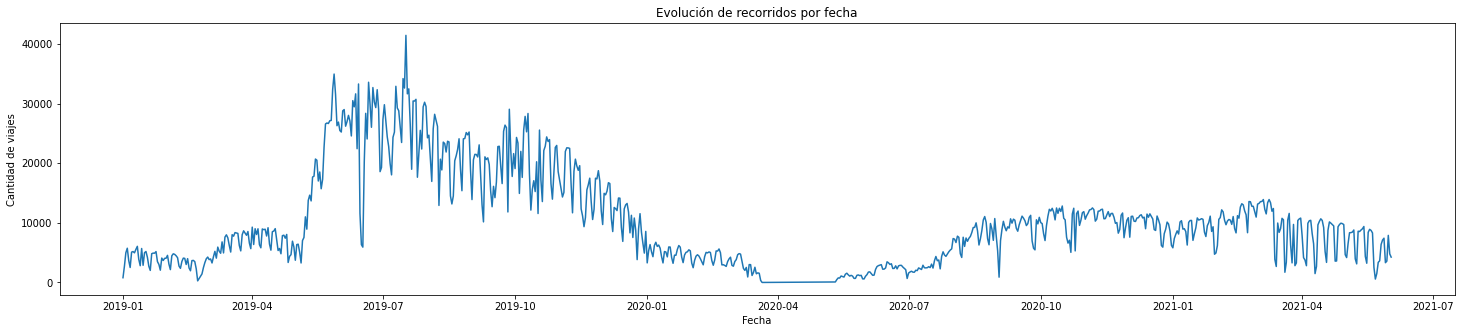

In [48]:
# Evolución de viajes
fig = plt.figure(figsize = (25, 5))
plt.plot(cant_viajes_fecha.index, cant_viajes_fecha.CANT_VIAJES)
plt.xlabel("Fecha")
plt.ylabel("Cantidad de viajes")
plt.title("Evolución de recorridos por fecha")
plt.show()

Se quiso evaluar la relacion entre la temperatura y la duracion de los viajes a traves del siguiente grafico, en el cual se confirma que las personas utilizan mas las bicicletas en la franja de temperaturas comprendidas entre 15 grados y 25 grados. 

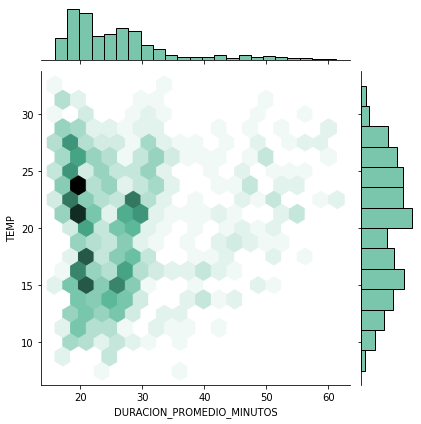

In [57]:
## Parece que la franja de temperaturas que se usa la bici es entre 15-25 °C y entre 20-30 minutos en promedio
## Los dias de lluvia se utiliza la bici, pero al ser menos los dias que llueve no genera relación directa al uso.
#sns.relplot(x="DURACION_PROMEDIO_MINUTOS", y="TEMP", hue="LLOVIO", data=viajes_clima)
sns.jointplot(x=viajes_clima.DURACION_PROMEDIO_MINUTOS, y=viajes_clima.TEMP, kind="hex", color="#4CB391")

En este grafico se busco si existia una correlación entre la cantidad de viajes, la temperatura promedio y la duración de los viajes, comparando los dias en los que llovio versus los que no llovio.

Los dias de lluvia se utiliza igual la bicicleta, pero en menor media que un dia soleado.

La temperatura afecta a la duración de los viajes y la cantidad de los mismos.

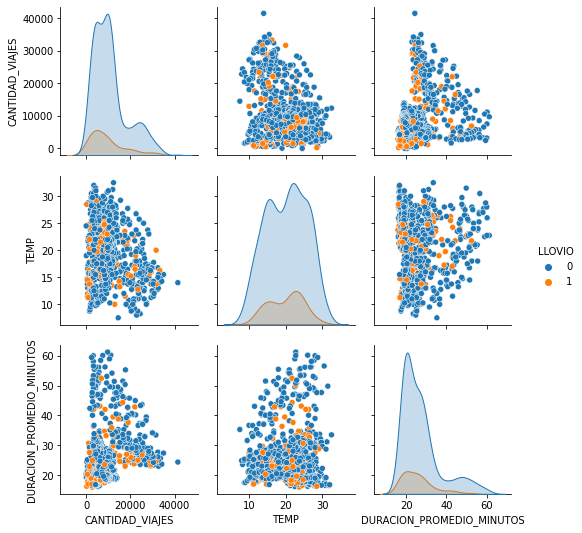

In [58]:
sns.pairplot(viajes_clima, hue='LLOVIO')

En el siguiente grafico vemos la duracion promedio de los viajes por año en minutos.

Vemos que en 2020 bajo este valor y en 2021 sigue con esta tendencia. 

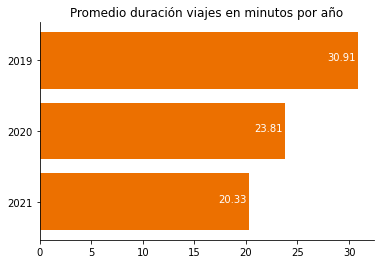

In [50]:
fig, ax = plt.subplots()
aux = duracion_viajes.reset_index().sort_values('año', ascending=False)
ax.barh( aux.año.astype(str) , aux.DURACION_PROMEDIO_MINUTOS, color='#EC7000')
for i, v in enumerate(aux.DURACION_PROMEDIO_MINUTOS):
    ax.text(v-3, i, str(v), color='white')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title('Promedio duración viajes en minutos por año')
plt.show()

En el siguiente grafico vemos la evolucion de la duracion promedio de los viajes en minutos, comparando los dias de la semana laboral verusus los dias de fin de semana.

Podemos observar que los fin de semana los viajes duran más, llegan al limite de 1 hora. Esto se debe a que se usa para pasear los dias sabado y domingo, mientras que de lunes a vieres son para trayecto cortos.

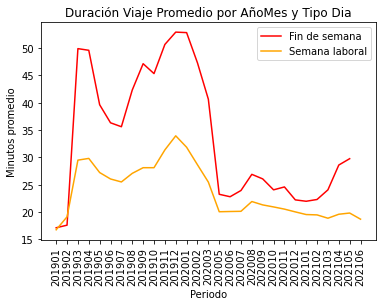

In [51]:
aux = recorridos_dias.reset_index()
aux = aux[aux.es_fin_de_semana == 1]
plt.plot(aux.añomes.astype(str) , aux.DURACION_VIAJE_PROMEDIO, label = "Fin de semana", color='red')
aux = recorridos_dias.reset_index()
aux = aux[aux.es_fin_de_semana == 0]
plt.plot(aux.añomes.astype(str) , aux.DURACION_VIAJE_PROMEDIO, label = "Semana laboral", color='orange')
plt.xlabel('Periodo')
plt.ylabel('Minutos promedio')
plt.title('Duración Viaje Promedio por AñoMes y Tipo Dia')
plt.xticks(rotation=90)
plt.legend()
plt.show()

En el siguiente mapa se observan las estaciones disponibles en Capital Federal. 

Actualmente las bicicletas se encuentran en 39 de los 48 barrios de Capital Federal.

Las estaciones cambian continuanmente de localización.

In [59]:
# Distribucón de estaciones de bici
fig = px.scatter_mapbox(geo_df,
                        lon=geo_df.geometry.x,
                        lat=geo_df.geometry.y,
                        hover_data=['nombre', 'ubicacion', 'tipo', 'horario', 'anclajes_t'],
                        center={'lat': -34.6083, 'lon': -58.3712},size='anclajes_t',
                        color_discrete_sequence=['orange'],
                        zoom=11)                      # Parametro para la visualización del mapa
fig.update_layout(mapbox_style='open-street-map')     # Seteo del estilo de mapa
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})   # Eliminación de los margenes
fig.show()  # Plot del mapa

print("Cantidad de estaciones de bici actuales: ", geo_df.shape[0]) ## 229

Cantidad de estaciones de bici actuales:  229


En el mapa se pueden observar las comunas que cuentan con mayor cantidad de viajes dentro de las mismas. Siendo la principal la comuna 1 comprendida por Constitucion, Monserrat, Puerto madero, Retiro, San Nicolas y San Telmo, y la comuna 2 comprendida por Palermo, las que mayor cantidad de viajes concentran dentro de Capital Federal.

Con respecto a las ciclovias, antes de la implementacion del sistema existian 25km y actualmente cuenta con 250km. 

In [53]:
# Visualizacion del mapa de recorridos
fig = px.choropleth_mapbox(df_geo_viajes_por_comunas,
                           geojson=df_geo_viajes_por_comunas.geometry,
                           locations=df_geo_viajes_por_comunas.index,
                           hover_data=["PERIMETRO", "AREA", "COMUNAS"],
                           color="CANTIDAD_VIAJES",
                           center={"lat": -34.6083, "lon": -58.3712},
                           color_continuous_scale='YlGnBu',
                           mapbox_style="open-street-map",
                           opacity=0.85,
                           zoom=10.3)                   # Parametro para la visualización del mapa
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})     # Eliminación de los margenes
fig.show()  # Plot del mapa
df_geo_viajes_por_comunas[['COMUNAS','CANTIDAD_VIAJES']].sort_values('CANTIDAD_VIAJES', ascending=False) # Visualizamos la tabla

COMUNAS  CANTIDAD_VIAJES
BARRIOS                                                                     
CONSTITUCION - MONSERRAT - PUERTO MADERO -  RET...      1.0          1887391
PALERMO                                                14.0          1380117
BALVANERA - SAN CRISTOBAL                               3.0           827662
ALMAGRO - BOEDO                                         5.0           765166
BELGRANO - COLEGIALES - NUÑEZ                          13.0           656916
BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRICIOS      4.0           598000
RECOLETA                                                2.0           578974
AGRONOMIA - CHACARITA -  PARQUE CHAS -  PATERNA...     15.0           565038
CABALLITO                                               6.0           501806
FLORES - PARQUE CHACABUCO                               7.0           392274
COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA U...     12.0           261093
VILLA DEL PARQUE - VILLA  DEVOTO - VILLA GRAL. ...     11.0           179749
LINIERS - MATADEROS - PARQUE AVELLANEDA                 9.0            60208
FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VER...     10.0            54234
VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI          8.0            41796

En el siguiente grafico quisimos ilustrar la evolución del uso de las bicicletas por comuna a traves de los años analizamos.

In [62]:
## Progresion del la utilziacion de bicicletas por Comuna
aux = df_recorridos_bici[['fecha_inicio_viaje','id_comuna_origen', 'id_usuario']]
aux = aux.merge(df_geo_viajes_por_comunas[['COMUNAS','ID']], how='left', left_on='id_comuna_origen', right_on='ID')
aux = aux.groupby(['fecha_inicio_viaje','COMUNAS'], sort=True).agg(CANTIDAD_VIAJES=('id_usuario','count'))
aux.reset_index(inplace=True) ## plotly debe trater los datos como texto para la barra de avance
aux['fecha_inicio_viaje'] = aux['fecha_inicio_viaje'].map(lambda x: x.strftime('%Y%m'))
aux = aux.groupby(['fecha_inicio_viaje','COMUNAS'], sort=True).agg(CANTIDAD_VIAJES=('CANTIDAD_VIAJES','sum'))
aux2 = aux.unstack(fill_value=0)
aux2 = aux2.cumsum(axis = 0)
aux3 = aux2.stack()
aux3.reset_index(inplace=True) ## plotly no soporte indices jerarquicos

fig = px.bar(aux3, 
             x = "COMUNAS", 
             y = "CANTIDAD_VIAJES",
             color ='CANTIDAD_VIAJES',
             animation_frame ='fecha_inicio_viaje', 
             range_y = [0, 2000000])
fig.show()

Text(0.5, 1.0, 'A donde llegan?')

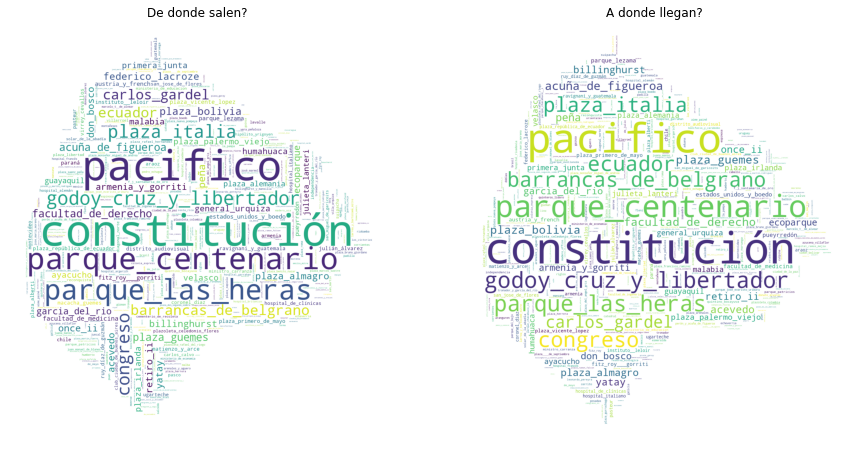

In [55]:
def nube_caba(columna_nube):
  caba_img = path + 'img/caba.jpg'

  #Carga la mascara para dar formato a la nube, negro sobre blanco, completando la zona en negro
  caba_mask = np.array(Image.open(caba_img))
  aux = pd.DataFrame(df_recorridos_bici[columna_nube].copy())
  aux[columna_nube] = aux[columna_nube].str.lower()
  aux[columna_nube] = aux[columna_nube].str.replace('[^a-zA-ZàèìòùÀÈÌÒÙáéíóúýÁÉÍÓÚÝâêîôûÂÊÎÔÛãñõÃÑÕäëïöüÿÄËÏÖÜŸçÇßØøÅåÆæœ]', ' ')
  aux[columna_nube] = aux[columna_nube].str.strip()
  aux[columna_nube] = aux[columna_nube].str.replace(' ','_')

  nube = WordCloud(background_color='white',
                   max_words=2000, 
                   mask=caba_mask, 
                   collocations=False,
                   width=800, 
                   height=400,
                   prefer_horizontal=0.6).generate(' '.join(aux[columna_nube]))
  return nube

# Estaciones de salida más utilizadas
de_donde_salen = nube_caba('nombre_estacion_origen')

# Estaciones de llegada más utilizadas
a_donde_llegan = nube_caba('nombre_estacion_destino')

f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(de_donde_salen)
axarr[0].axis('off')
axarr[0].set_title('De donde salen?')
axarr[1].imshow(a_donde_llegan)
axarr[1].axis('off')
axarr[1].set_title('A donde llegan?')

# Tablero power bi

[link](https://app.powerbi.com/view?r=eyJrIjoiNDUxZTdhZjYtZTBlMy00NzU0LWFhOTUtZTFkNzQ4MWJjYmVlIiwidCI6IjViODA2NTZiLWQ2Y2ItNDYwMC1iNGRlLTExNDlhYTUxNTUwYSIsImMiOjR9)

## Conclusión

Buscamos, a lo largo de todo el trabajo, ver el impacto de la pandemia en el uso de bicicletas.

Observamos que la modalidad home office afectó profundamente la cantidad de gente que se traslada a la Ciudad durante la semana. Ademas, según la aplicación Google Maps, y de acuerdo a la solicitud de recorridos verificados entre marzo y octubre del año pasado, el uso de las bicicletas subió un 98% en la Ciudad, pero dicho aumento no se vio reflejado en el servicio de ecobicis. 

Por otra parte, se analizo el uso de las bici en función del estado del clima, encontrandose que las mismas se utilizan de todas formas pero en menor medida.

Debido a las restricciones de la pandemia, las personas eligieron comprarse una bicicleta para evitar el uso del transporte publico, y utlizarlas tanto para ir al trabajo como los fin de semana.

El cybermonday y los precios reducidos en las bicicletas permitieron este incremento segun los datos de mercadolibre y el bajo costo en los seguros.

Llegamos a la conclusión de que la pandemia afectó el comportamiento de los usuarios que utilizan el servicio de ecobicis en la Ciudad de Buenos Aires. 

A raiz de lo expuesto previamente notamos una disminución en el servicio, el cual estimamos que se mantendra constante en el tiempo al menos durante 2021.

## Almacenamiento de resultados



In [56]:
# Cantidad de viajes por fecha
cant_viajes_fecha.to_csv(path + 'exports/cant_viajes_fecha.csv', index=True)

# Cantidad de viajes por dias de la semana
recorridos_dias.to_csv(path + 'exports/recorridos_dias.csv', index=True)

# Cantidad de viajes por fecha y duración promedio de viajes
duracion_viajes.to_csv(path + 'exports/duracion_viajes.csv', index=True)

# Cantidad de viajes entre comunas
viajes_entre_comunas.to_csv(path + 'exports/viajes_entre_comunas.csv', index=True)

# Cantidad de viaje según clima
viajes_clima.to_csv(path + 'exports/viajes_clima.csv', index=True)

# Cantidad de viajes por comunas
viajes_por_comuna.to_csv(path + 'exports/viajes_por_comuna.csv', index=True)

# Recorridos completos
df_recorridos_bici.to_csv(path + 'exports/viajes.csv', index=False)

## Bibliografía

[EcoBici](https://www.baecobici.com.ar/es/inicio)

[Bicis itau](https://www.itau.com.ar/bici-itau/Paginas/bici-itau.aspx)

[Twitter BA Ecobici](https://twitter.com/BAecobici)

[App EcoBici Android](https://play.google.com/store/apps/details?id=com.tembici.ecobici&hl=es_AR&gl=US)

[App EcoBici IOs](https://apps.apple.com/ar/app/ba-ecobici-por-tembici/id1452339584)

[Nota Telam uso bicicletas en cuarentena](https://www.telam.com.ar/notas/202011/535515-el-uso-de-la-bicicleta-crecio-un-83-durante-la-cuarentena-en-el-pais.html)

[Nota Gobierno CABA boom de uso de bicicletas](https://www.buenosaires.gob.ar/ecobici/noticias/boom-de-la-bici-se-multiplicaron-los-viajes-y-las-mujeres-ciclistas-que-circulan)

[Nota Gobierno CABA record de ciclistas](https://www.buenosaires.gob.ar/carbononeutral/coronavirus-en-la-argentina-por-la-pandemia-hay-record-de-ciclistas-en-la-ciudad-de)

[Data set bicis Gobierno CABA](https://data.buenosaires.gob.ar/dataset/bicicletas-publicas)

[Data set estaciones bici Gobierno CABA](https://data.buenosaires.gob.ar/dataset/estaciones-bicicletas-publicas)

[Data set comunaas Gobierno CABA](https://data.buenosaires.gob.ar/dataset/comunas)


[Historia bicis CABA](https://www.buenosaires.gob.ar/ecobici/historia-de-la-bici)


[Ecobici sistema pago](https://argentina.as.com/argentina/2021/03/14/actualidad/1615735045_035807.html)


